
# Project: Investigating IMDb Movie Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected to analyze The IMDb movie data. The questions to explore are:\
    1. Which feature are associated with high popularity?\
    2. Which genres are most popular from year to year?\
    3. What kinds of properties are associated with movies that have high revenues?

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

I am reading a dataset and taking a look at the data.

In [193]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I find out the dimensions of the dataframe.

In [194]:
df.shape

(10866, 21)

Then I do summary statistics for the dataset.

In [195]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I check for the null values in each column

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

Firstly I remove all the rows with 'genres' null, since I will be analyzing the popularity of each genre.

In [197]:
df.dropna(subset=['genres'], how='any', inplace=True)

I check if the number of entries coincides with the number of non-null values in 'genres' column.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10843 non-null  int64  
 1   imdb_id               10835 non-null  object 
 2   popularity            10843 non-null  float64
 3   budget                10843 non-null  int64  
 4   revenue               10843 non-null  int64  
 5   original_title        10843 non-null  object 
 6   cast                  10768 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10801 non-null  object 
 9   tagline               8037 non-null   object 
 10  keywords              9368 non-null   object 
 11  overview              10840 non-null  object 
 12  runtime               10843 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9827 non-null   object 
 15  release_date       

I look if the dataframe has duplicated rows.

In [199]:
df.fillna(0);
sum(df.duplicated())

1

Since there is one duplicate, I drop it and check the shape of the dataframe.

In [200]:
df.drop_duplicates(inplace=True)
df.shape

(10842, 21)

I drop the columns that I am not going to analyse.

In [201]:
df.drop(['imdb_id','homepage', 'tagline','overview','production_companies','keywords','tagline','cast','director'], axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Which feature are associated with high popularity? 

I decide to check the histogram of the values that I have for better understanding of the dataset.

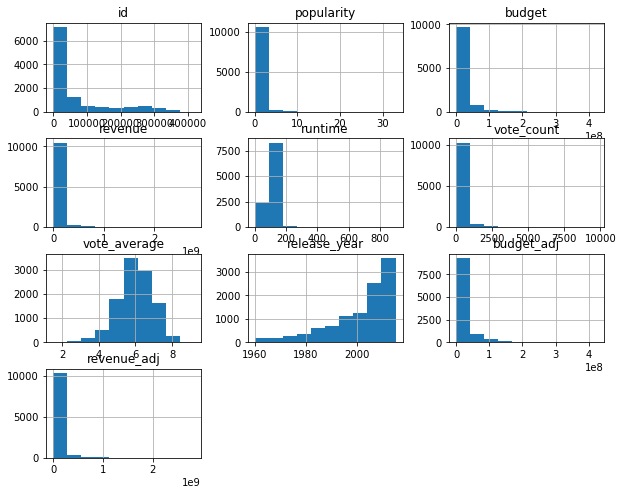

In [202]:
df.hist(figsize=(10,8));

I decide to check the correlation between the popularity and the vote_average.

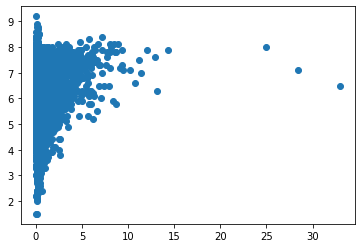

In [203]:
plt.scatter(df['popularity'],df['vote_average']);

The relation is such that there are no really popular movies with a 'vote_average' lower than '5'. On the other hand, movies with 'vote_average' higher than 8 are not popular at all, so probably they represent a specific taste of certain voters.

I decide to find out more about distribution of popularity.

In [204]:
df['popularity'].describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

Simce the 75% seems to be of really low popularity I decide to work only with somewhat popular movies(higher than 95%).

In [205]:
high_pop = np.percentile(df['popularity'], 95)
df_p = df.query('popularity >{}'.format(high_pop))
df_p.shape

(543, 13)

I check how many poupular movies were released each year.

In [206]:
df_p.groupby('release_year')['id'].count()

release_year
1960     1
1961     1
1962     1
1963     2
1964     2
1967     2
1968     1
1971     2
1972     1
1973     1
1974     1
1975     3
1976     2
1977     2
1979     2
1980     2
1981     1
1982     3
1983     2
1984     6
1985     2
1986     1
1987     1
1988     2
1989     8
1990     6
1991     3
1992     4
1993     4
1994     8
1995    10
1996     5
1997    12
1998     7
1999    10
2000     5
2001    16
2002    12
2003    15
2004    19
2005    15
2006    15
2007    20
2008    16
2009    18
2010    23
2011    29
2012    27
2013    33
2014    75
2015    84
Name: id, dtype: int64

Highly popular movies

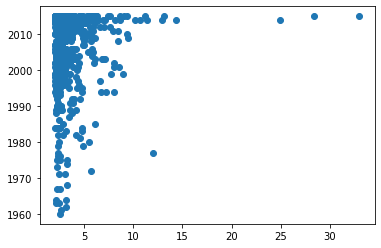

In [207]:
plt.scatter(df_p['popularity'],df_p['release_year'])

I filter out the movies that are even more popular.

In [208]:
highest_pop = np.percentile(df['popularity'], 99)
df_hp = df.query('popularity >{}'.format(highest_pop))
df_hp.shape

(109, 13)

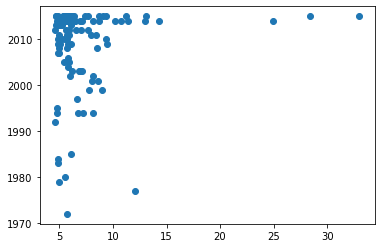

In [209]:
plt.scatter(df_hp['popularity'],df_hp['release_year']);

3 most popular movies are:

In [210]:
df.query('popularity >20')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,24.949134,165000000,621752480,Interstellar,169,Adventure|Drama|Science Fiction,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08


<a id='eda'></a>
### Which genres are most popular from year to year? 

Firstly I extract the genres of highly popular movies.

In [211]:
genre_set = set()
for genre in df_p['genres']:
    genre_set = genre_set.union(set(genre.split('|')))

I print the set of genres and check its length.

In [212]:
print(genre_set)
print(len(genre_set))

{'Action', 'Science Fiction', 'Animation', 'Western', 'Thriller', 'Drama', 'Romance', 'War', 'Mystery', 'Crime', 'Horror', 'Comedy', 'History', 'Fantasy', 'Family', 'Music', 'Adventure'}
17


I create a separate dataframe for the analysis and update its index.

In [213]:
df_g=df_p[['original_title','release_year', 'popularity','genres']]
df_g.insert(1, "index", range(0, len(df_g)), True)
df_g.set_index('index', inplace=True)

I add the columns of each genre to the dataframe.

In [214]:
genre_list=list(genre_set)
for i in range( len(genre_list)):
    df_g.insert(i+l, genre_list[i], 0, True)
df_g.head()

,original_title,release_year,popularity,genres,Action,Science Fiction,Animation,Western,Thriller,Drama,...,War,Mystery,Crime,Horror,Comedy,History,Fantasy,Family,Music,Adventure
index,,,,,,,,,,,,,,,,,,,,,
0,Jurassic World,2015,32.985763,Action|Adventure|Science Fiction|Thriller,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mad Max: Fury Road,2015,28.419936,Action|Adventure|Science Fiction|Thriller,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Insurgent,2015,13.112507,Adventure|Science Fiction|Thriller,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Star Wars: The Force Awakens,2015,11.173104,Action|Adventure|Science Fiction|Fantasy,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Furious 7,2015,9.335014,Action|Crime|Thriller,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I distribute the popularity of each movie between the genres that it belongs to.

In [215]:
for i, row in df_g.iterrows():
    genres_i = df_g.iloc[i]['genres'].split('|')
    for j in range(len(genres_i)):
        df_g.at[i, genres_i[j]]=df_g.iloc[i]['popularity']/len(genres_i)

I create a table that contains a total popularity of a certain genre in each year.

In [216]:
df_g.groupby('release_year')[genre_list].sum()

,Action,Science Fiction,Animation,Western,Thriller,Drama,Romance,War,Mystery,Crime,Horror,Comedy,History,Fantasy,Family,Music,Adventure
release_year,,,,,,,,,,,,,,,,,
1960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1962,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1963,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1964,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1971,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1972,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0


I calculate the popularity of each genre over the years.

In [217]:
df_g[genre_list].sum()

Action             191
Science Fiction    125
Animation           29
Western              5
Thriller           132
Drama              164
Romance             35
War                 11
Mystery             23
Crime               55
Horror              17
Comedy             110
History              5
Fantasy             62
Family              43
Music                5
Adventure          159
dtype: int64

### What kinds of properties are associated with movies that have high revenues?

Firstly, I check the distribution of the revenue.

In [218]:
df['revenue'].describe()

count    1.084200e+04
mean     3.991138e+07
std      1.171179e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.414118e+07
max      2.781506e+09
Name: revenue, dtype: float64

I filter out high and low revenue movie to analyse them separately.

In [219]:
high_rev = np.percentile(df['revenue'], 75)
df_hrev= df.query('revenue >{}'.format(high_rev))
df_lrev = df.query('revenue<={}'.format(high_rev))

I check the mean budget of high revenue movies.

In [220]:
df_hrev['budget'].mean()

45428850.15344891

Next I check mean budget of low revenue movies.

In [221]:
df_lrev['budget'].mean()

4394939.161603739

It turns out that high revenue movies have 10 times higher average budget.

In [222]:
df_hrev['budget'].mean()/df_lrev['budget'].mean()

10.336627762754208

I put htis to histogram. Apparently, the total number of low revenue movies is much bigger.

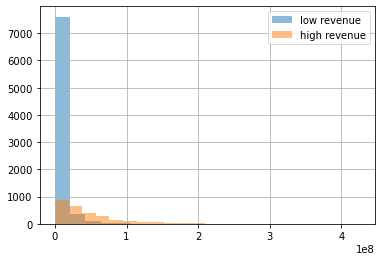

In [223]:
df_lrev.budget.hist(alpha=0.5,bins=20,label='low revenue')
df_hrev.budget.hist(alpha=0.5,bins=20,label='high revenue')
plt.legend();

Similarly, I analyse high and low revenue movies against the relese year. Here my main conclusion is that there are simply more movies with time.

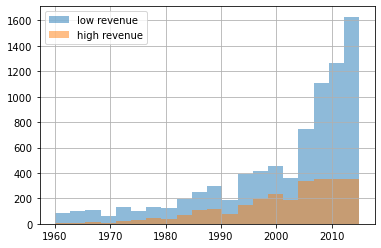

In [224]:
df_lrev['release_year'].hist(alpha=0.5,bins=20,label='low revenue')
df_hrev['release_year'].hist(alpha=0.5,bins=20,label='high revenue')
plt.legend();

I build a scatter plot to see the correlation between the movies with the highest revenue and the most popular movies.

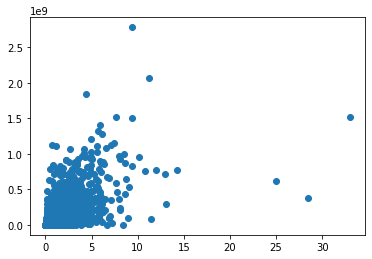

In [225]:
plt.scatter(df['popularity'], df['revenue']);

I check which movies have the highest revenue. This are not the same as the most poular movies.

In [226]:
highest_rev = np.percentile(df['revenue'], 99.98)
df.query('revenue >{}'.format(highest_rev))

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
1386,19995,9.432768,237000000,2781505847,Avatar,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
5231,597,4.355219,200000000,1845034188,Titanic,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09


<a id='conclusions'></a>
## Conclusions

My main conclusions after analysing the IMDb dataset are following.\
The amount of both movies with high popularity and high revenue represents rather small percent of the total number of movies. The amount of popular movies released increases with time.\
The most popular genres over all years are Action, Adventure, Drama, Triller, Since Fiction and Comedy. This genres were also the most popular genres during 2015.\
High revenue movies have 10 times higher budget than the low revenue movies on averadge.\
Three top popular movies are "Jurassic World", "Mad Max: Fury Road" and "Interstellar". They were all released rather recently(2014 and 2015).\
Three highest revenue movies are completely different. These are "Star Wars: The Force Awakens", "Avatar" and "Titanic". They were all released in different years.